In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy as np
from skimage.morphology import opening, closing

In [14]:
def process_image(i, subfolder, extension, ):
    img = cv2.imread("images/"+subfolder+"/"+str(i)+"."+extension, 0)

    invImg = np.invert(img)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

    # Black Hat Transform
    blackHat = cv2.morphologyEx(invImg, cv2.MORPH_BLACKHAT, kernel)

    # Elementos estructurales
    im2 = opening(image = invImg - blackHat)
    im3 = closing(image = im2)

    _, binary = cv2.threshold(im3, 130, 255, cv2.THRESH_BINARY)

    # Gráficas
    fig, axs = plt.subplots(1, 2)
    fig.set_figheight(15)
    fig.set_figwidth(15)

    # imagen original
    axs[0].imshow(img, cmap='gray'),axs[0].axis('off'),axs[0].set_title('Original: ' + str(i)) 
    
    # imagen binaria
    axs[1].imshow(binary, cmap='gray'),axs[1].axis('off'),axs[1].set_title('Binary: '+ str(i)) 

# Sin CLAHE

## Imágenes de personas sanas

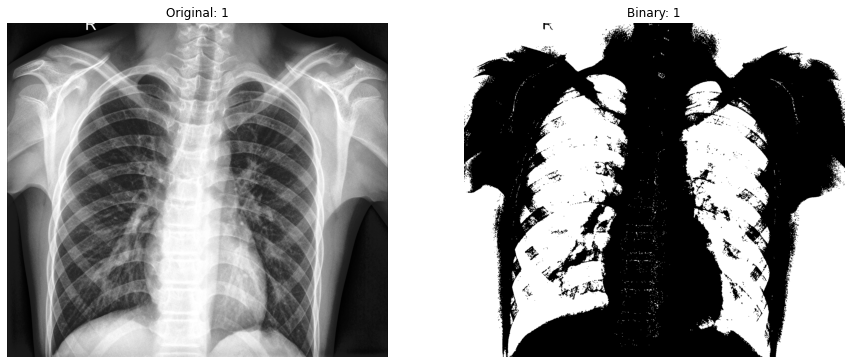

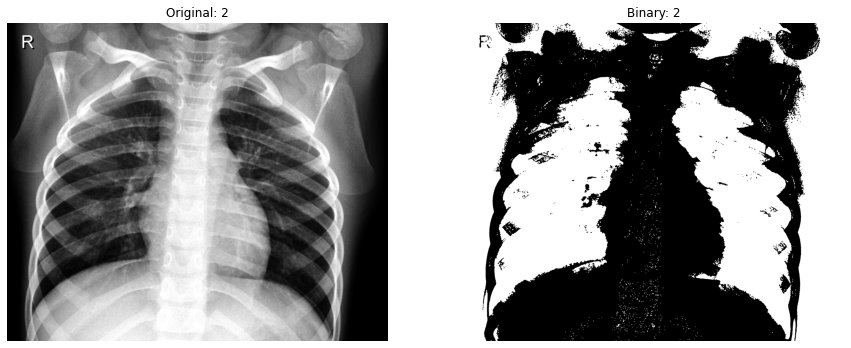

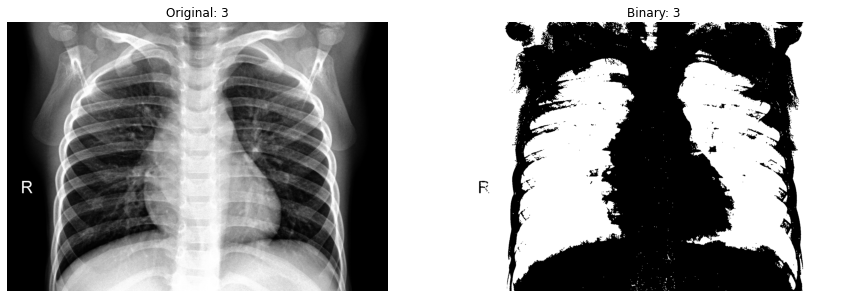

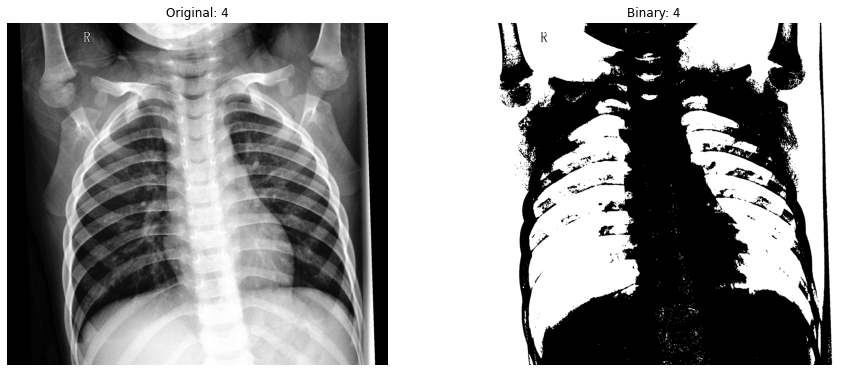

In [15]:
for i in range(1, 5):
    process_image(i, "originales/sanas", "jpeg")

## Imágenes de personas con covid

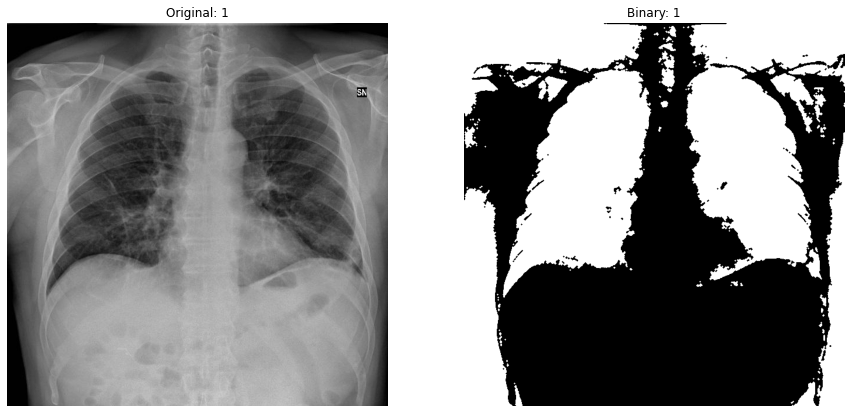

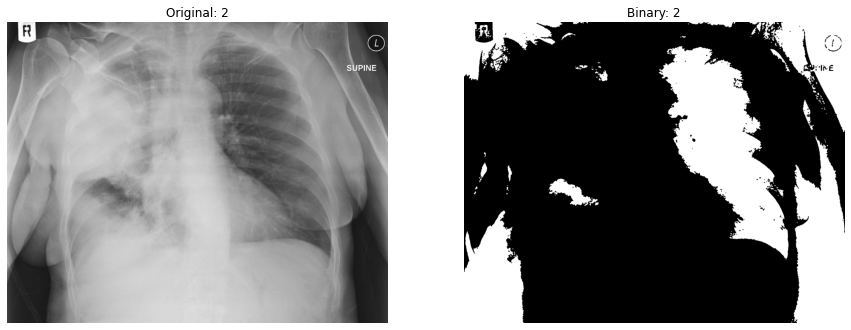

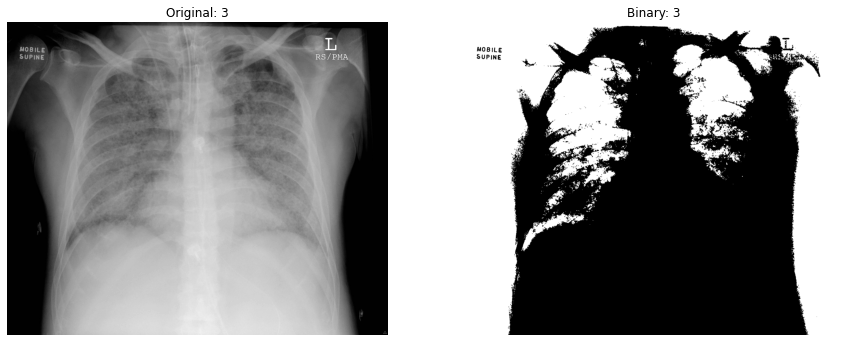

In [16]:
for i in range(1, 4):
    process_image(i, "originales/covid", "jpg")

# Con CLAHE

## Imágenes de personas sanas

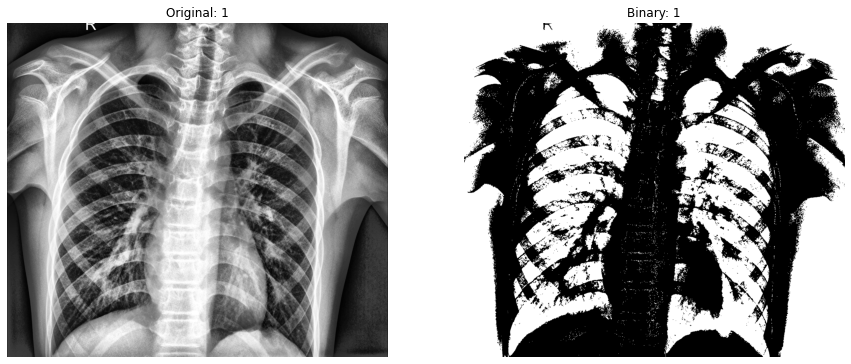

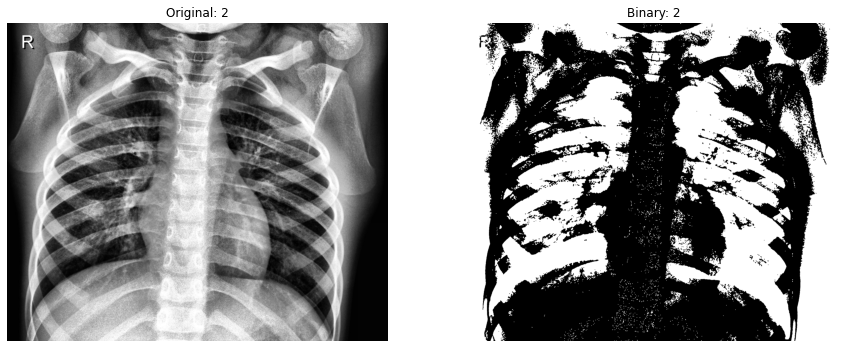

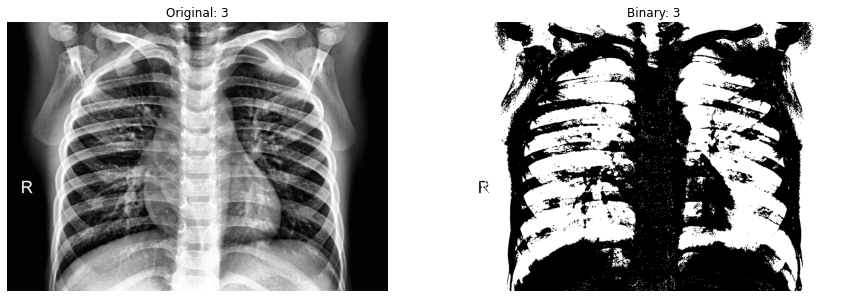

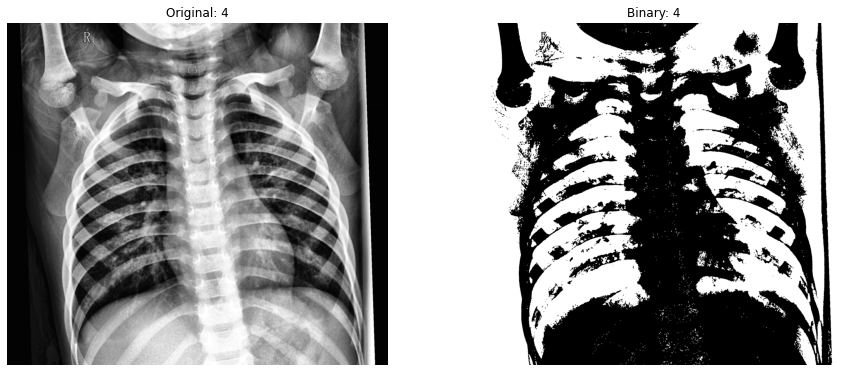

In [17]:
for i in range(1, 5):
    process_image(i, "CLAHE/sanas", "jpeg")

## Imágenes de personas con covid

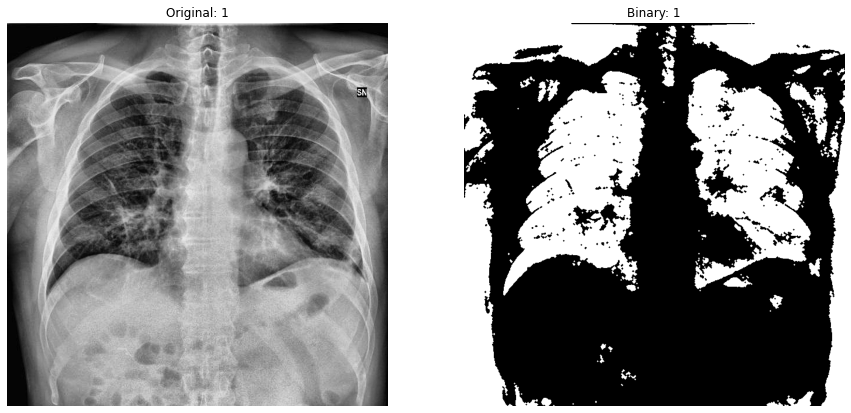

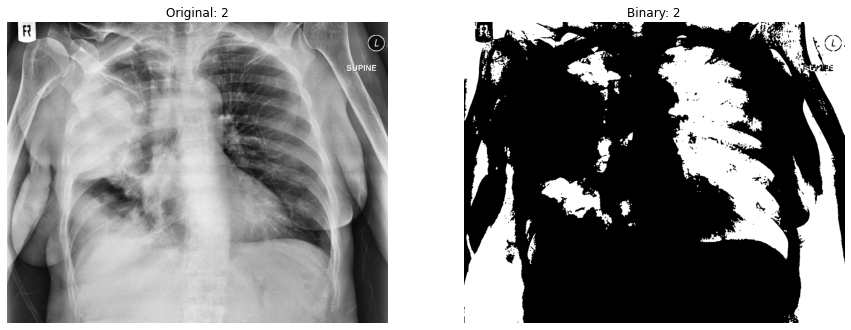

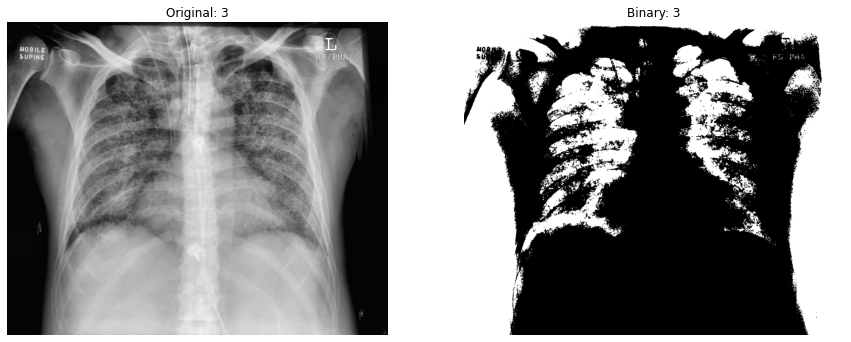

In [18]:
for i in range(1, 4):
    process_image(i, "CLAHE/covid", "jpg")